# Airbnb Prices in European Cities analysis
This notebook is a data analysis on the Airbnb prices in the following European cities; Amsterdam, Athens, Barcelona, Berlin, Budapest, Lisbon, London, Paris, Rome & Vienna.



## Scope of the Project
This project will initially be divided in the following parts:

1. Initial data inspection
2. Price comparison between cities in dataset
3. Influence of spatial factors on price
4. What makes a superhost and how does it relate to prices?
5. What makes a listing intended for business purposes and how does it relate to prices?
6. Multiple Regression Model to find strongest determinants of price and to make predictions



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr

In [2]:
#pallete that will be used throughout analysis in graphs
pallete = ['#E8E8E8', '#BFBFBF', '#96939B', '#564256', '#FC814A']

Import all the different datasets and combine them.

In [3]:
amsterdam_weekdays = pd.read_csv('amsterdam_weekdays.csv')
amsterdam_weekends = pd.read_csv('amsterdam_weekends.csv')
athens_weekdays = pd.read_csv('athens_weekdays.csv')
athens_weekends = pd.read_csv('athens_weekends.csv')
barcelona_weekdays = pd.read_csv('barcelona_weekdays.csv')
barcelona_weekends = pd.read_csv('barcelona_weekends.csv')
berlin_weekdays = pd.read_csv('berlin_weekdays.csv')
berlin_weekends = pd.read_csv('berlin_weekends.csv')
budapest_weekdays = pd.read_csv('budapest_weekdays.csv')
budapest_weekends = pd.read_csv('budapest_weekends.csv')
lisbon_weekdays = pd.read_csv('lisbon_weekdays.csv')
lisbon_weekends = pd.read_csv('lisbon_weekends.csv')
london_weekdays = pd.read_csv('london_weekdays.csv')
london_weekends = pd.read_csv('london_weekends.csv')
paris_weekdays = pd.read_csv('paris_weekdays.csv')
paris_weekends = pd.read_csv('paris_weekends.csv')
rome_weekdays = pd.read_csv('rome_weekdays.csv')
rome_weekends = pd.read_csv('rome_weekends.csv')
vienna_weekdays = pd.read_csv('vienna_weekdays.csv')
vienna_weekends = pd.read_csv('vienna_weekends.csv')


In [4]:
def combine(csv_1, col_1, csv_2, col_2, city):
    csv_1['week_time'] = col_1
    csv_2['week_time'] = col_2
    merged = pd.concat([csv_1, csv_2])
    merged['city'] = city
    return merged

In [5]:
amsterdam = combine(amsterdam_weekdays,'weekdays',amsterdam_weekends,'weekends','amsterdam')
athens = combine(athens_weekdays,'weekdays',athens_weekends,'weekends','athens')
barcelona = combine(barcelona_weekdays,'weekdays',barcelona_weekends,'weekends','barcelona')
berlin = combine(berlin_weekdays,'weekdays',berlin_weekends,'weekends','berlin')
budapest = combine(budapest_weekdays,'weekdays',budapest_weekends,'weekends','budapest')
lisbon = combine(lisbon_weekdays,'weekdays',lisbon_weekends,'weekends','lisbon')
london = combine(london_weekdays,'weekdays',london_weekends,'weekends','london')
paris = combine(paris_weekdays,'weekdays',paris_weekends,'weekends','paris')
rome = combine(rome_weekdays,'weekdays',rome_weekends,'weekends','rome')
vienna = combine(vienna_weekdays,'weekdays',vienna_weekends,'weekends','vienna')

In [6]:
cities = [amsterdam, athens, barcelona, berlin, budapest, lisbon, london, paris, rome, vienna]
city_names = [city.city.unique()[0].capitalize() for city in cities]
europe_data = pd.concat(cities, ignore_index=True)
europe_data.drop(columns = ['Unnamed: 0'], inplace=True)

### 1 Initial Data Inspection


In [7]:
europe_data.head(250)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week_time,city
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,weekdays,amsterdam
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,weekdays,amsterdam
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,weekdays,amsterdam
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,weekdays,amsterdam
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,weekdays,amsterdam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,442.434326,Private room,False,True,2.0,True,1,0,10.0,96.0,...,2.081927,2.005066,238.593306,12.633674,297.960053,20.762285,4.86382,52.36785,weekdays,amsterdam
246,202.704286,Private room,False,True,2.0,True,1,0,10.0,98.0,...,8.328174,3.322728,52.990159,2.805864,66.140933,4.608795,5.00683,52.34575,weekdays,amsterdam
247,258.008577,Shared room,True,False,3.0,True,1,0,10.0,98.0,...,7.174061,3.005379,64.407387,3.410414,79.805762,5.560980,4.79000,52.36000,weekdays,amsterdam
248,245.822886,Private room,False,True,2.0,True,1,0,10.0,96.0,...,3.869384,1.154180,142.055958,7.521957,184.102389,12.828519,4.85118,52.34976,weekdays,amsterdam


In [8]:
europe_data.sample(5)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week_time,city
33909,557.600895,Entire home/apt,False,False,4.0,False,0,1,10.0,96.0,...,2.088605,0.218976,461.671234,22.474000,1325.818909,77.904505,2.34224,48.87403,weekdays,paris
36421,414.996738,Entire home/apt,False,False,3.0,False,0,1,9.0,91.0,...,0.437901,0.164583,571.492491,27.788864,1293.807126,59.686340,2.35509,48.86019,weekends,paris
47850,242.676455,Entire home/apt,False,False,3.0,False,0,1,9.0,91.0,...,3.148013,1.851923,525.073282,11.633231,2049.824122,44.660695,12.46743,41.88963,weekends,rome
22634,194.501282,Private room,False,True,2.0,True,1,0,10.0,100.0,...,4.974861,1.877393,224.662700,15.616554,475.702762,8.517855,-0.16235,51.46926,weekdays,london
3368,83.425117,Entire home/apt,False,False,2.0,True,0,0,10.0,97.0,...,1.818960,0.425308,152.634323,5.754948,219.285511,16.465291,23.72217,37.96296,weekdays,athens


Looking at europe_data.head() and europe_data.sample(5) we can see the following features:

In [9]:
europe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

attr_index, atrr_index_norm, rest_index and rest_index_norm are not specified in any documentation accompanying the data set. It remains a bit unclear what these features mean, so we will not use in the analysis. 

Further, we can see that there are no non-null counts in the dataset and we have int64, float64, object and boolean datatypes in the dataset.

In [10]:
europe_data.describe(include='all')

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week_time,city
count,51707.000000,51707,51707,51707,51707.000000,51707,51707.000000,51707.000000,51707.000000,51707.000000,...,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707,51707
unique,NaN,3,2,2,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,10
top,NaN,Entire home/apt,False,False,NaN,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekends,london
freq,NaN,32648,51341,33014,NaN,38475,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26207,9993
mean,279.879591,NaN,NaN,NaN,3.161661,NaN,0.291353,0.350204,9.390624,92.628232,...,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128,NaN,NaN
std,327.948386,NaN,NaN,NaN,1.298545,NaN,0.454390,0.477038,0.954868,8.945531,...,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263,NaN,NaN
min,34.779339,NaN,NaN,NaN,2.000000,NaN,0.000000,0.000000,2.000000,20.000000,...,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000,NaN,NaN
25%,148.752174,NaN,NaN,NaN,2.000000,NaN,0.000000,0.000000,9.000000,90.000000,...,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510,NaN,NaN
50%,211.343089,NaN,NaN,NaN,3.000000,NaN,0.000000,0.000000,10.000000,95.000000,...,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690,NaN,NaN
75%,319.694287,NaN,NaN,NaN,4.000000,NaN,1.000000,1.000000,10.000000,99.000000,...,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885,NaN,NaN


The dataset consists of 51707 entries and looking at the max values of for example, realSum and distance, we need to be wary of some outliers.

The weekend and weekdays are distributed pretty evenly with a frequency of 26207 'weekends' listings, wich is slightly more than 50% of 51707. The city with the most listings in this dataset is London with 9993 data entries, wchich is almost 20% of the dataset. Looking at the value counts below we can see that not every city is represented equally in the dataset. But with 2080 data entries for the city (amsterdam) with the least data entries, we have plenty data to be sure this is a realistic representation.

In [11]:
listing_counts = europe_data.groupby('city').realSum.count().reset_index()
superhost_count = europe_data.groupby('city').host_is_superhost.sum().reset_index()
superhost_count['abbr'] = superhost_count.city.apply(lambda x: x[:3].upper())

listing_superhost_count = pd.merge(listing_counts, superhost_count).sort_values('realSum', ascending=False)
listing_superhost_count['perc'] = listing_superhost_count.apply(lambda row:
                                                                round((row['host_is_superhost'] / row['realSum'] * 100), 1), axis=1)
listing_superhost_count['perc'] = listing_superhost_count.perc.apply(lambda x: str(x)+"%")

listing_superhost_count

,city,realSum,host_is_superhost,abbr,perc
6,london,9993,1573,LON,15.7%
8,rome,9027,2949,ROM,32.7%
7,paris,6688,941,PAR,14.1%
5,lisbon,5763,1233,LIS,21.4%
1,athens,5280,2263,ATH,42.9%
4,budapest,4022,1524,BUD,37.9%
9,vienna,3537,1005,VIE,28.4%
2,barcelona,2833,514,BAR,18.1%
3,berlin,2484,639,BER,25.7%
0,amsterdam,2080,591,AMS,28.4%


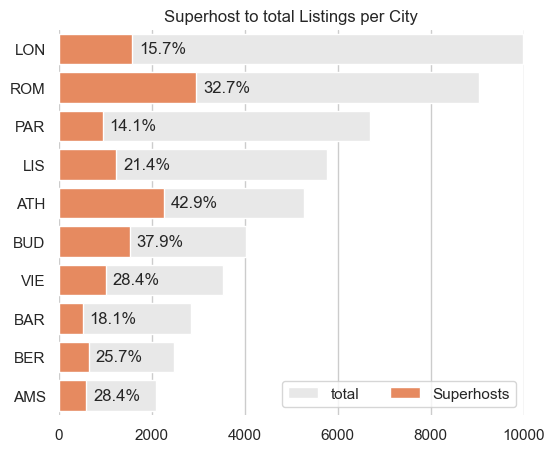

<Figure size 640x480 with 0 Axes>

In [12]:
sns.set_theme(style='whitegrid')

f, ax = plt.subplots(figsize=(6, 5))

sns.set_color_codes('pastel')
sns.barplot(x='realSum', y='abbr', data=listing_superhost_count, label='total', color='#E8E8E8')

sns.set_color_codes('muted')
sns.barplot(x='host_is_superhost', y='abbr', data=listing_superhost_count, label='Superhosts', color='#FC814A')

ax.legend(ncol=2, loc='lower right', frameon=True)
ax.set(xlim=(0,10000), ylabel='', xlabel='')
ax.bar_label(ax.containers[1], labels=listing_superhost_count.perc, label_type='edge', padding=5)
sns.despine(left=True, bottom=True)

plt.title('Superhost to total Listings per City')
plt.show()
plt.clf()

To gain an intuitive understanding of other categorical data like room_type, room_shared, host_is_superhost, etc. we will use pie charts.

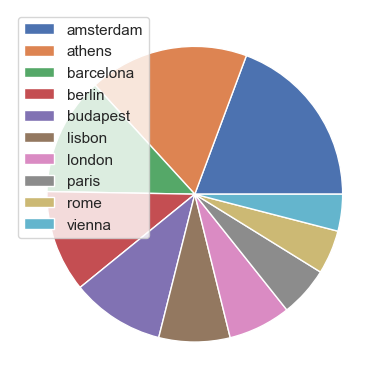

In [13]:
plt.pie(europe_data.city.value_counts())
plt.legend(europe_data.city.unique())

### 2 Price comparison between cities in dataset

In the function below we combine the weekdays and the weekends of a particular city and also add a new column 'city', since we will be combining all the cities into one big dataset. Also we rank the cities based on average 'realSum' so it is possible to order the boxplot graph.

In [14]:
ranks = europe_data.groupby('city')['realSum'].mean().sort_values()[::-1].index
ranks

Index(['amsterdam', 'paris', 'london', 'barcelona', 'berlin', 'vienna',
       'lisbon', 'rome', 'budapest', 'athens'],
      dtype='object', name='city')

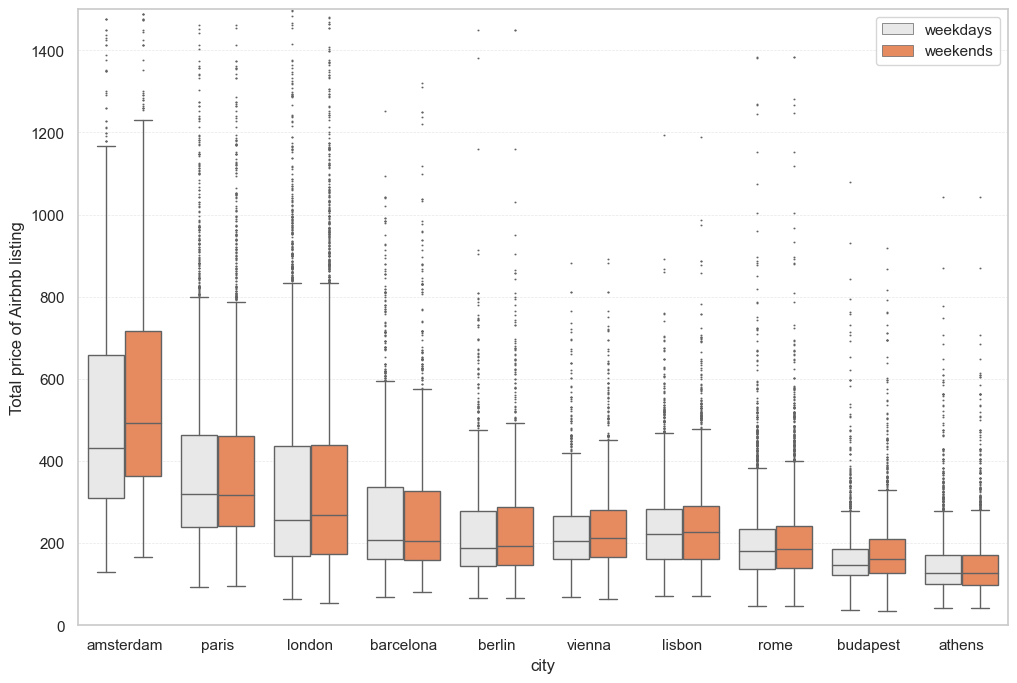

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(12, 8))
ax = plt.subplot()
plt.axis([0,8,0,1500])
sns.set_theme(style='ticks', palette='pastel')
sns.boxplot(x="city", y="realSum", hue="week_time", palette=['#E8E8E8', '#FC814A'], 
            data=europe_data, fliersize=0.5, linewidth=1, order=ranks)
plt.ylabel('Total price of Airbnb listing')
ax.set_xticklabels(ranks)
plt.grid(axis='y', color='#E8E8E8', linestyle='--', linewidth=.5)
plt.legend(loc=1)
plt.show()
plt.clf()

### 3 Influence of Spatial factors to Price
In this next part we investigate whether there is a correlation between the price (realSum) and the distance to the city centre and also between the price (realSum) and the longitude and latitude of a particular listing.

In [16]:
europe_data_weekends = europe_data[europe_data.week_time == 'weekends']

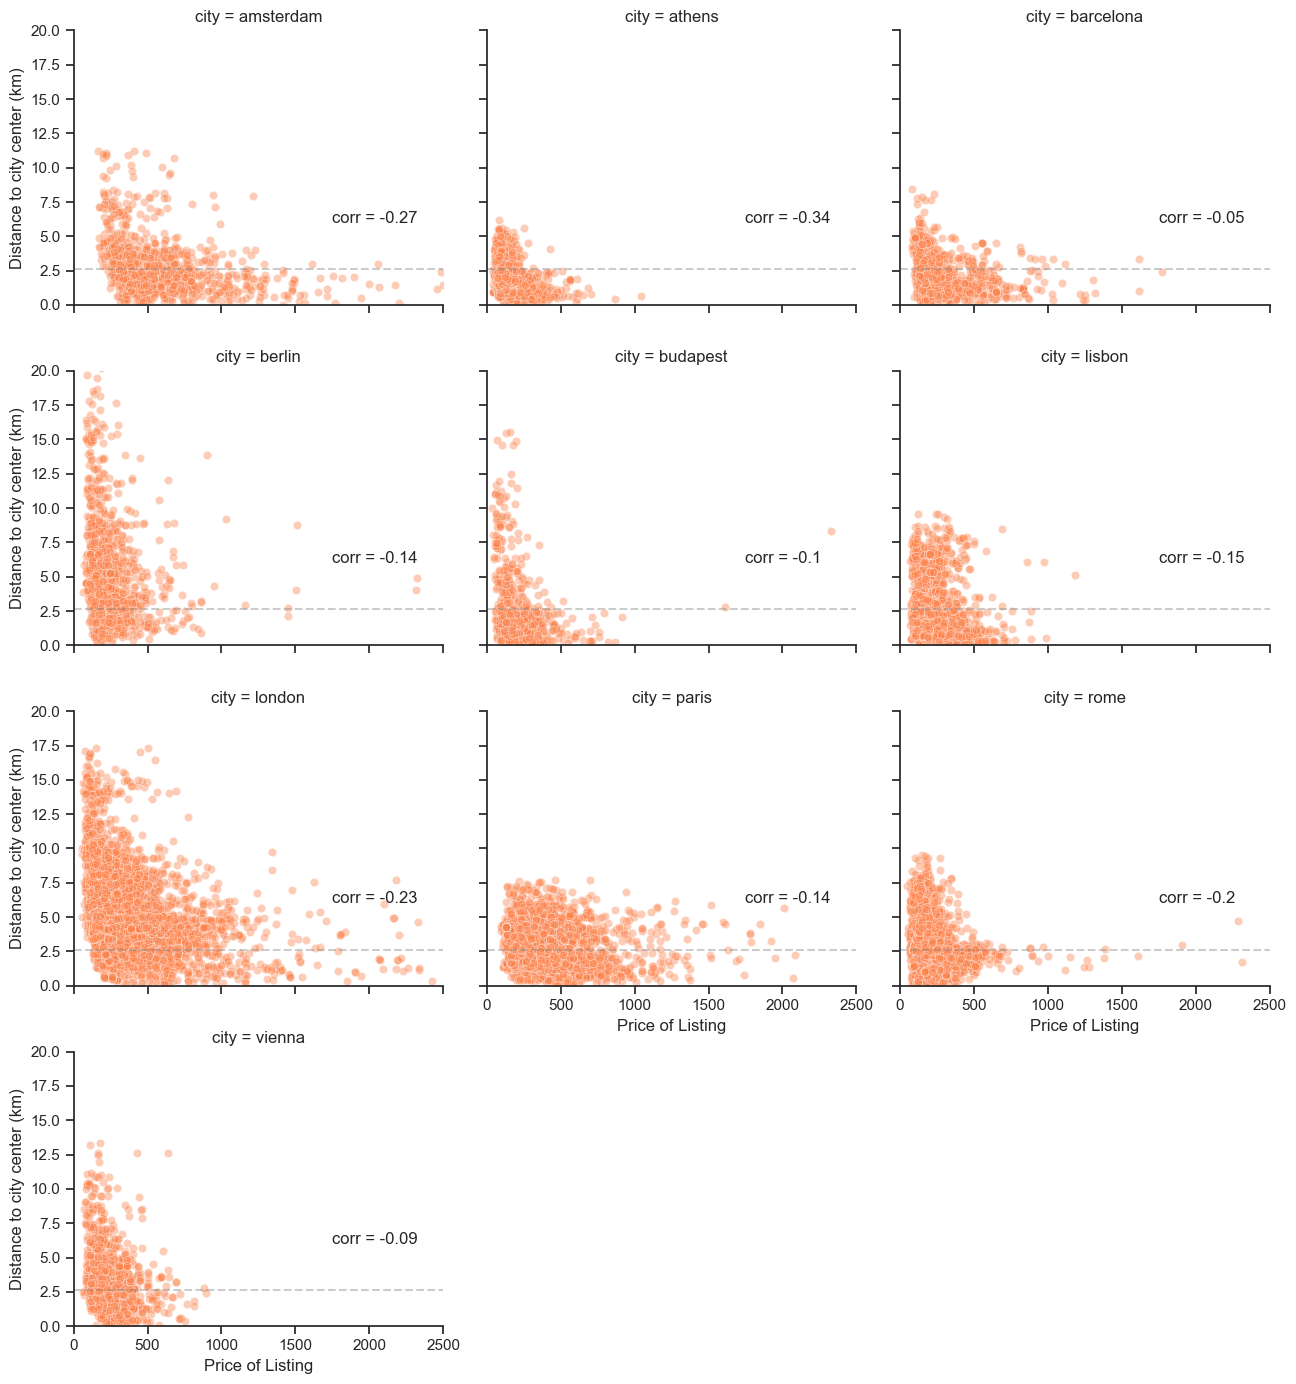

In [17]:
grid = sns.FacetGrid(europe_data_weekends, col='city', col_wrap=3, xlim=(0, 2500), ylim=(0, 20), height=3.5, aspect=1.25
                    , margin_titles=True)
grid.map(sns.scatterplot, "realSum", "dist", color='#FC814A', alpha=.4)
grid.refline(y=europe_data_weekends.dist.median(), alpha=.4)
grid.set_axis_labels("Price of Listing", "Distance to city center (km)")
grid.set_titles(template=europe_data_weekends.city)

def annotate(data, **kws):
    n = len(data)
    corr, p = pearsonr(data.realSum, data.dist)
    ax = plt.gca()
    ax.text(.7, .3, f"corr = {round(corr,2)}", transform=ax.transAxes)

grid.map_dataframe(annotate)


plt.show()

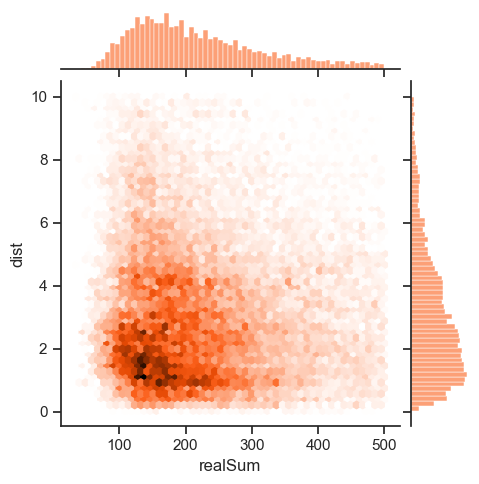

In [18]:
sns.jointplot(x=europe_data.realSum[(europe_data.realSum < 500) & (europe_data.dist < 10)],
              y=europe_data.dist[(europe_data.realSum < 500) & (europe_data.dist < 10)], 
              kind="hex", color='#FC814A', height=5)

### 4 What makes a superhost and how does it relate to prices?

### 5 What makes a listing business purposed and how does it relate to prices?

### 6 Multiple Regression Model to find strongest determinants of price and to make predictions